<a href="https://colab.research.google.com/github/aholloman79/A-Primer-on-Scientific-Programming-with-Python/blob/master/The_Bootstrap_in_Bioinformatics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original alpha: 0.6894
Bootstrap Standard Error: 0.0377
95% Confidence Interval for alpha: [0.6146, 0.7620]


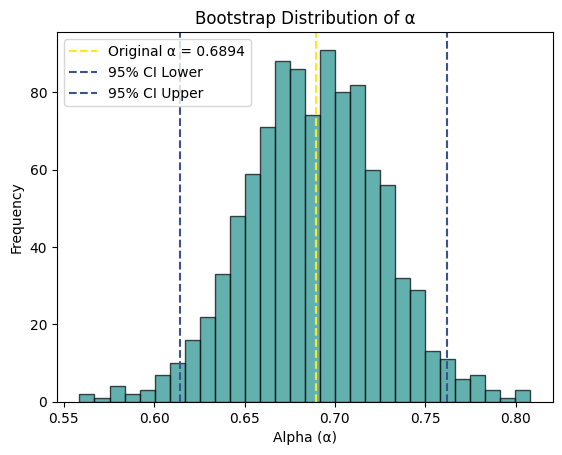

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# I am simulating data for two assets (X and Y) to mimic returns in a simplified investment scenario.
np.random.seed(42)
n_samples = 100
X = np.random.normal(loc=10, scale=2, size=n_samples)  # I set the mean and standard deviation for X.
Y = np.random.normal(loc=8, scale=3, size=n_samples)   # I do the same for Y but with different parameters.

# This function helps me calculate the optimal proportion alpha to minimize the variance of my investment.
def calculate_alpha(X, Y):
    # I first calculate the variances of X and Y since I need them for the formula.
    var_X = np.var(X, ddof=1)  # I use ddof=1 to get the sample variance.
    var_Y = np.var(Y, ddof=1)

    # Next, I compute the covariance between X and Y because it measures how the two assets interact.
    cov_XY = np.cov(X, Y)[0, 1]

    # Using these values, I calculate alpha, the proportion of my investment in X.
    alpha = (var_Y - cov_XY) / (var_X + var_Y - 2 * cov_XY)
    return alpha

# Now, I calculate alpha for my original dataset to have a baseline estimate.
alpha_original = calculate_alpha(X, Y)

# Here, I create a function to perform bootstrapping, allowing me to estimate the variability of alpha.
def bootstrap_alpha(X, Y, n_bootstrap=1000):
    # I will resample the data multiple times to generate bootstrap samples.
    alphas = []  # I will store the calculated alphas here.
    n = len(X)  # I need to know the size of the dataset for resampling.

    for _ in range(n_bootstrap):
        # I create a bootstrap sample by sampling with replacement.
        indices = np.random.choice(range(n), size=n, replace=True)
        X_sample = X[indices]
        Y_sample = Y[indices]

        # For each bootstrap sample, I recalculate alpha using the same formula.
        alpha_bootstrap = calculate_alpha(X_sample, Y_sample)
        alphas.append(alpha_bootstrap)

    # I return the list of bootstrap alphas so I can analyze their distribution later.
    return np.array(alphas)

# I now generate 1,000 bootstrap samples and calculate alpha for each.
bootstrap_alphas = bootstrap_alpha(X, Y)

# Using the bootstrap alphas, I estimate the standard error and confidence intervals for alpha.
alpha_se = np.std(bootstrap_alphas)  # This gives me the standard error of alpha.
alpha_ci_lower = np.percentile(bootstrap_alphas, 2.5)  # I calculate the lower bound of the 95% CI.
alpha_ci_upper = np.percentile(bootstrap_alphas, 97.5)  # I calculate the upper bound of the 95% CI.

# I print out the results to summarize my findings.
print(f"Original alpha: {alpha_original:.4f}")
print(f"Bootstrap Standard Error: {alpha_se:.4f}")
print(f"95% Confidence Interval for alpha: [{alpha_ci_lower:.4f}, {alpha_ci_upper:.4f}]")

# Finally, I visualize the bootstrap distribution to see how alpha varies across samples.
plt.hist(bootstrap_alphas, bins=30, color="#21908CFF", edgecolor="black", alpha=0.7)
plt.axvline(x=alpha_original, color="#FDE725FF", linestyle="--", label=f"Original α = {alpha_original:.4f}")
plt.axvline(x=alpha_ci_lower, color="#3B528BFF", linestyle="--", label="95% CI Lower")
plt.axvline(x=alpha_ci_upper, color="#3B528BFF", linestyle="--", label="95% CI Upper")
plt.xlabel("Alpha (α)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distribution of α")
plt.legend()
plt.show()
